In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [92]:
dataset = pd.read_csv("Housing.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [93]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [94]:
order = [dataset["furnishingstatus"].unique().tolist()]

In [95]:
oe = OrdinalEncoder(categories=order)

In [96]:
dataset["furnishingstatus"] = oe.fit_transform(dataset[["furnishingstatus"]])

In [97]:
colm = dataset.select_dtypes(include=["object"]).columns.tolist()
colm

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [98]:
OHE = OneHotEncoder(drop='first', sparse_output=False)

In [99]:
encoded_array = OHE.fit_transform(dataset[colm])

In [100]:
encoded_df = pd.DataFrame(encoded_array, columns=OHE.get_feature_names_out(colm), index=dataset.index)

In [101]:
dataset[encoded_df.columns] = encoded_df
dataset.drop(columns=colm, inplace=True)

In [102]:
dataset

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,2.0,1.0,0.0,1.0,0.0,0.0,0.0
541,1767150,2400,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
542,1750000,3620,2,1,1,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


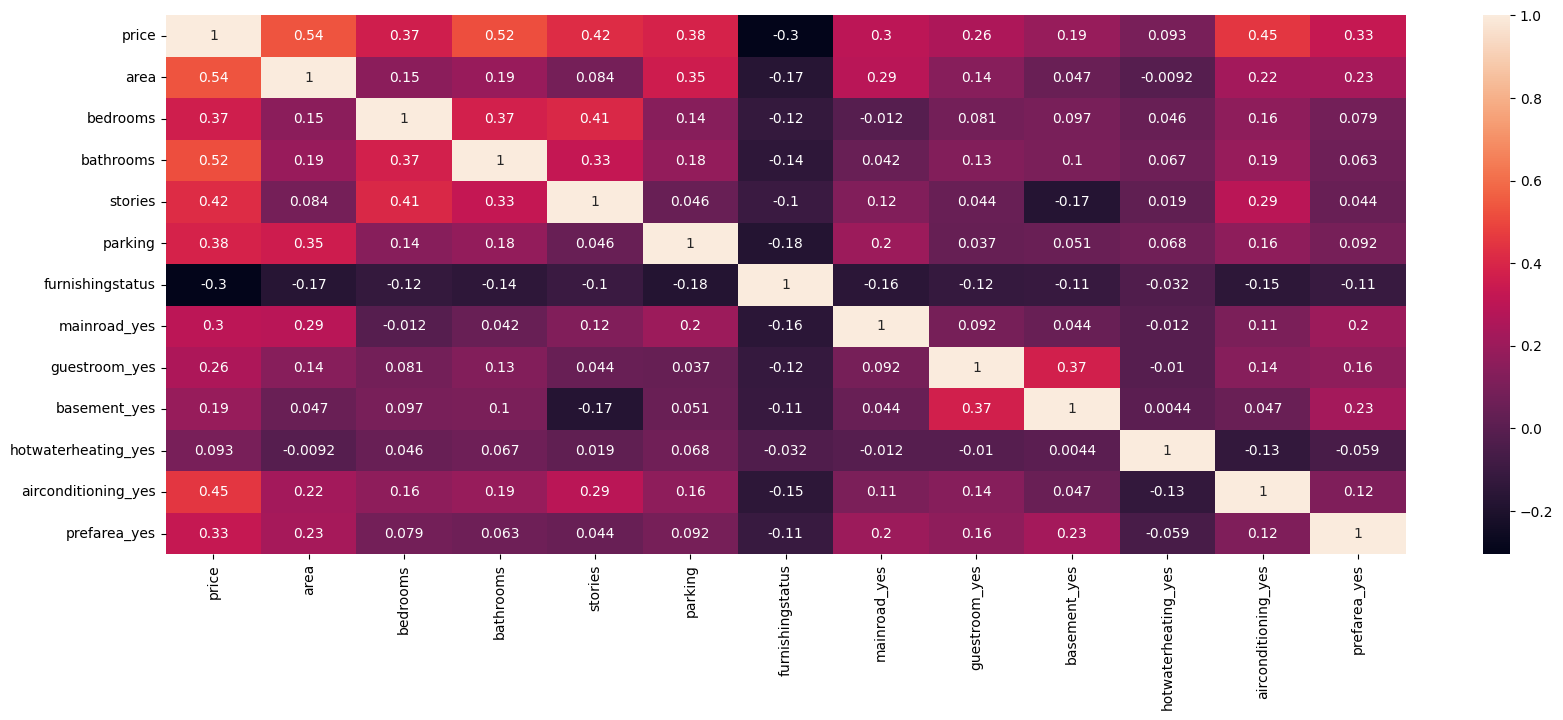

In [103]:
plt.figure(figsize=(20,7))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [104]:
x = dataset.iloc[:, 1:]
y = dataset["price"]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

In [106]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [107]:
lr.score(x_test, y_test)*100

66.14628548582817

In [108]:
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

919520.6451757508
1560062846482.4194
1249024.7581543047


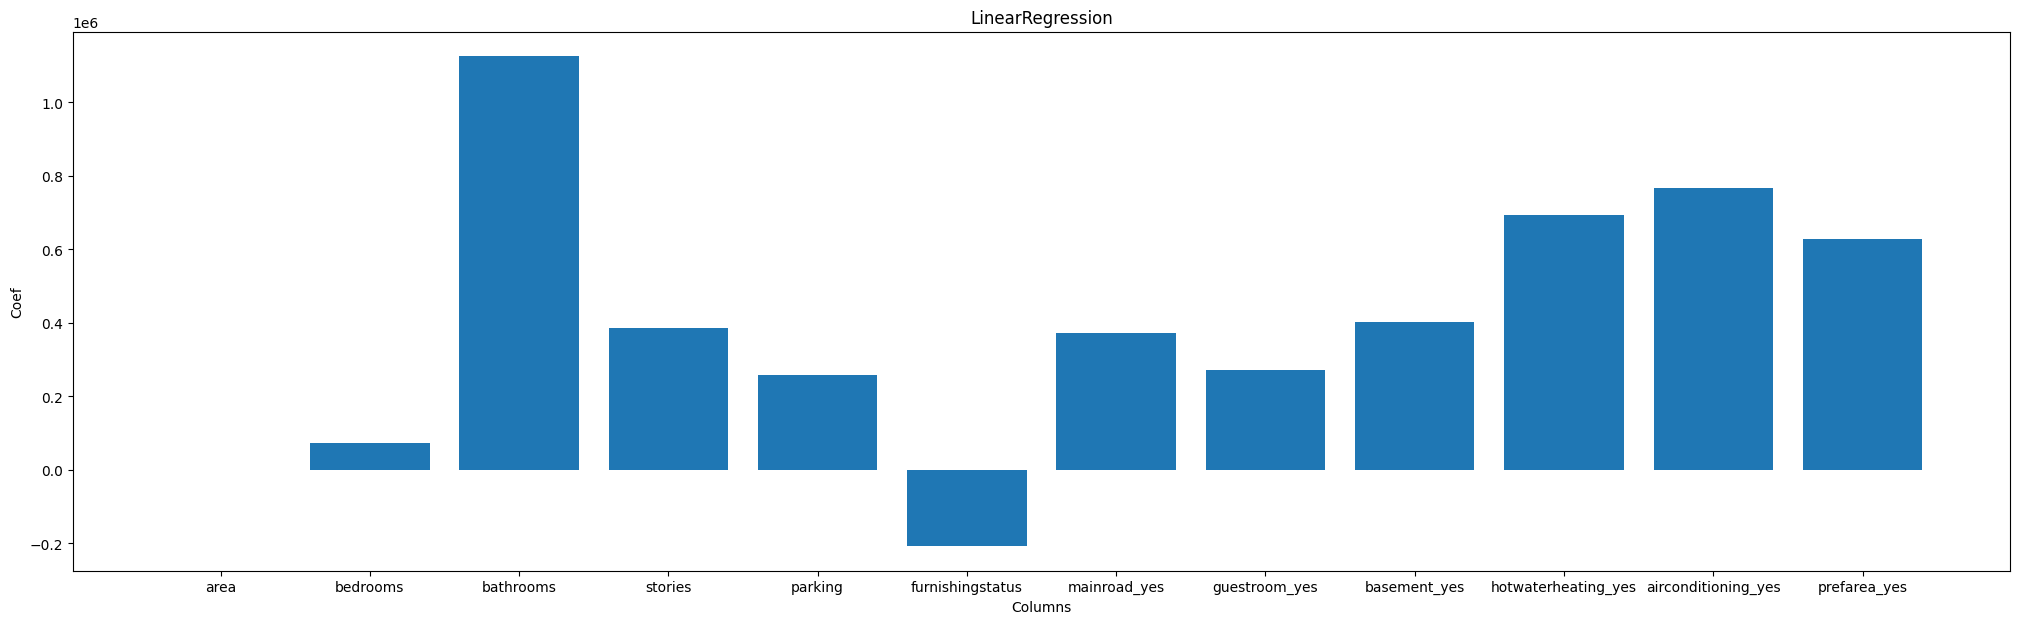

In [109]:
plt.figure(figsize=(25, 7))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

# Lasso

In [110]:
ls = Lasso(alpha=10)
ls.fit(x_train, y_train)

Lasso(alpha=10)

In [111]:
ls.score(x_test, y_test)*100

66.14579935677621

In [112]:
ls.coef_

array([ 2.39857092e+02,  7.22090555e+04,  1.12555688e+06,  3.85895474e+05,
        2.59485817e+05, -2.07067783e+05,  3.71759673e+05,  2.72042821e+05,
        4.01483986e+05,  6.91961021e+05,  7.66624668e+05,  6.27787302e+05])

In [113]:
lr.coef_

array([ 2.39846499e+02,  7.22127240e+04,  1.12558958e+06,  3.85890372e+05,
        2.59487246e+05, -2.07066774e+05,  3.71839795e+05,  2.72092676e+05,
        4.01496586e+05,  6.92196148e+05,  7.66673437e+05,  6.27828389e+05])

In [114]:
print(mean_absolute_error(y_test, ls.predict(x_test)))
print(mean_squared_error(y_test, ls.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ls.predict(x_test))))

919522.351326494
1560085248510.777
1249033.7259300796


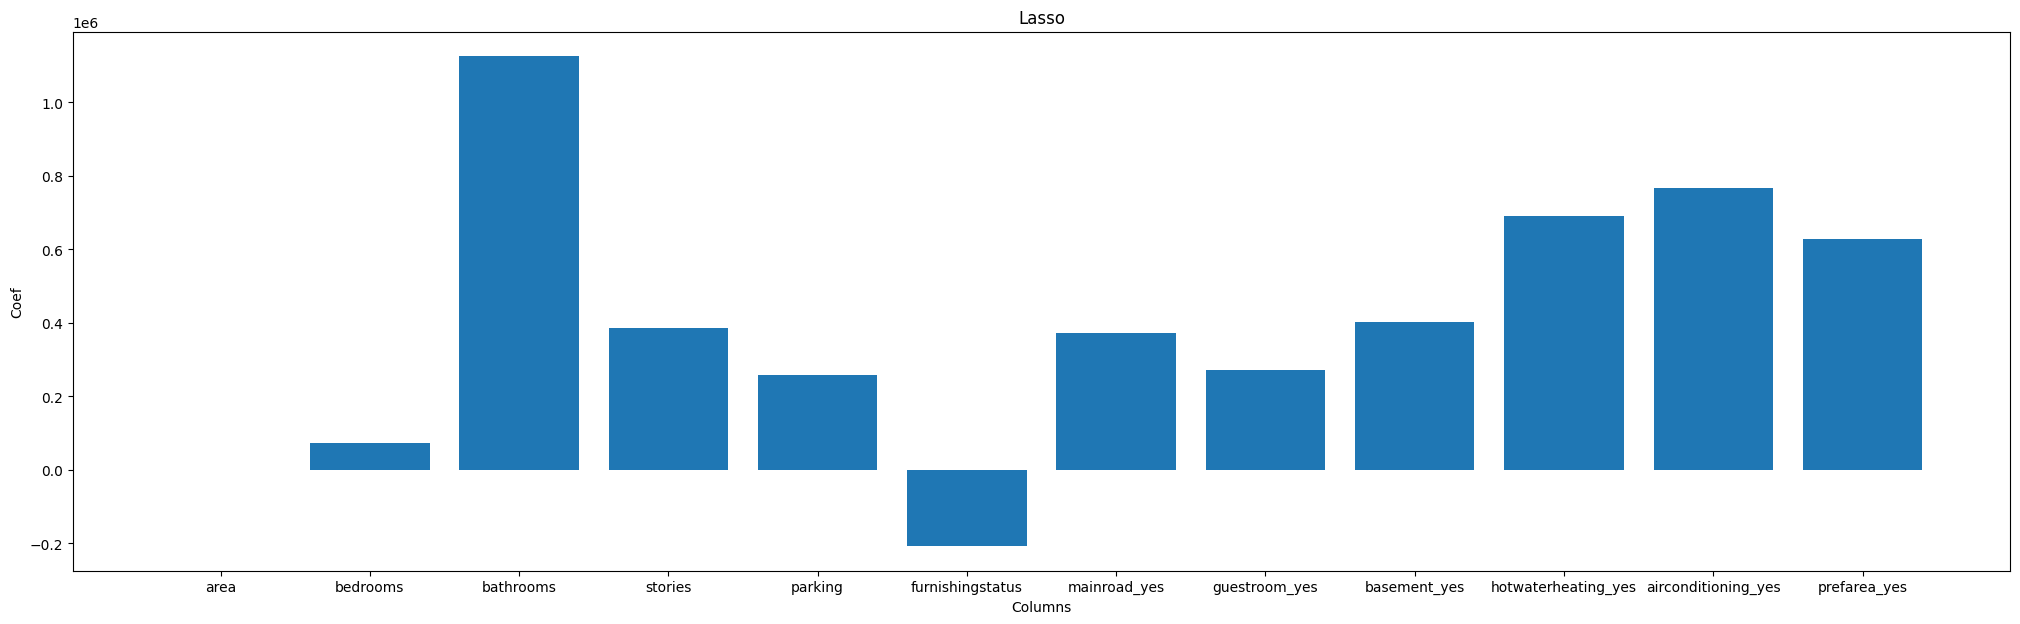

In [115]:
plt.figure(figsize=(25, 7))
plt.bar(x.columns, ls.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

# Ridge

In [116]:
rg = Ridge(alpha=10)
rg.fit(x_train,y_train)

Ridge(alpha=10)

In [117]:
rg.score(x_test, y_test)*100

65.75548265182138

In [118]:
print(mean_absolute_error(y_test, rg.predict(x_test)))
print(mean_squared_error(y_test, rg.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, rg.predict(x_test))))

916245.4318458956
1578072007083.653
1256213.36049401


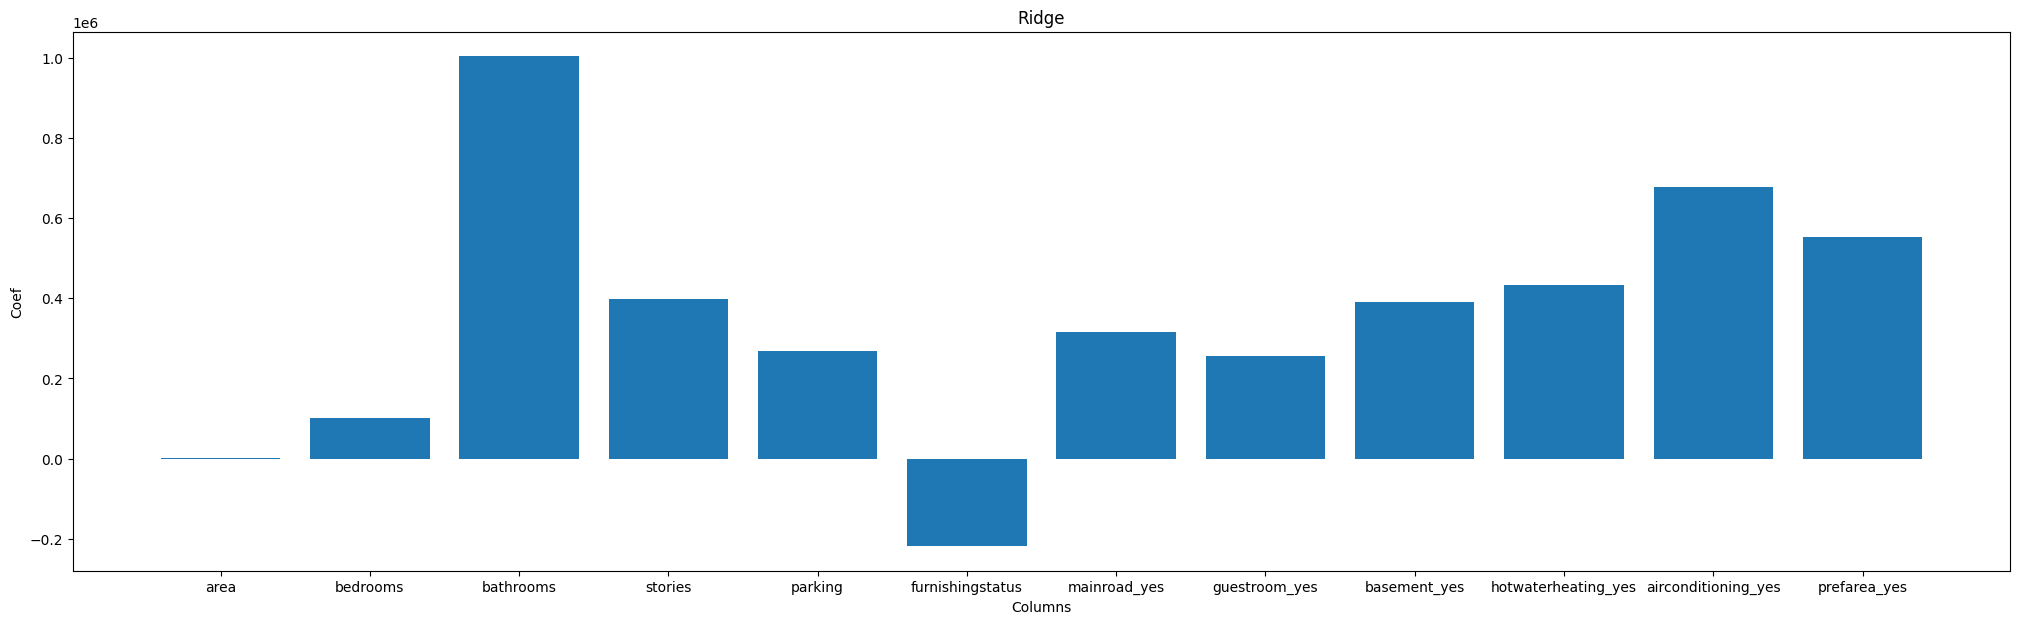

In [119]:
plt.figure(figsize=(25, 7))
plt.bar(x.columns, rg.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

In [121]:
n_data = pd.DataFrame({"Columns_name":x.columns,"LinearRegression":lr.coef_,"Lasso":ls.coef_,"Ridge":rg.coef_})

In [122]:
n_data

,Columns_name,LinearRegression,Lasso,Ridge
0,area,2.398465e+02,2.398571e+02,2.513599e+02
1,bedrooms,7.221272e+04,7.220906e+04,1.012868e+05
2,bathrooms,1.125590e+06,1.125557e+06,1.004281e+06
3,stories,3.858904e+05,3.858955e+05,3.988272e+05
4,parking,2.594872e+05,2.594858e+05,2.692197e+05
5,furnishingstatus,-2.070668e+05,-2.070678e+05,-2.184532e+05
6,mainroad_yes,3.718398e+05,3.717597e+05,3.145714e+05
7,guestroom_yes,2.720927e+05,2.720428e+05,2.565964e+05
8,basement_yes,4.014966e+05,4.014840e+05,3.910290e+05
9,hotwaterheating_yes,6.921961e+05,6.919610e+05,4.318971e+05
